<a href="https://colab.research.google.com/github/roshank1605A04/FIFA-2019-Analysis/blob/master/FIFA2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [0]:
%time data = pd.read_csv('drive/My Drive/Projects/Footballer/Footballer.csv')

print(data.shape)

CPU times: user 311 ms, sys: 30.7 ms, total: 342 ms
Wall time: 359 ms
(18207, 89)


In [0]:
data.sample(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2375,2375,219793,T. Didillon,22,https://cdn.sofifa.org/players/4/19/219793.png,France,https://cdn.sofifa.org/flags/18.png,74,81,RSC Anderlecht,https://cdn.sofifa.org/teams/2/light/229.png,€6M,€11K,1177,Left,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,16.0,"Jun 15, 2018",NaN,2022,6'2,194lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,13.0,15.0,25.0,14.0,23.0,19.0,15.0,28.0,22.0,57.0,54.0,55.0,63.0,33.0,22.0,57.0,25.0,67.0,16.0,27.0,14.0,9.0,40.0,22.0,37.0,13.0,18.0,20.0,75.0,72.0,72.0,75.0,76.0,€10.2M
2551,2551,212197,D. Heuer Fernandes,25,https://cdn.sofifa.org/players/4/19/212197.png,Portugal,https://cdn.sofifa.org/flags/38.png,74,78,SV Darmstadt 98,https://cdn.sofifa.org/teams/2/light/110502.png,€5M,€13K,1122,Right,1.0,4.0,1.0,Medium/ Medium,Normal,No,GK,1.0,"Jul 1, 2016",NaN,2020,6'2,179lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,11.0,10.0,31.0,7.0,22.0,13.0,12.0,26.0,31.0,42.0,44.0,39.0,68.0,33.0,22.0,70.0,43.0,69.0,9.0,25.0,16.0,7.0,40.0,19.0,28.0,12.0,16.0,11.0,74.0,72.0,75.0,69.0,77.0,€8.4M
14708,14708,229397,M. Vargas,22,https://cdn.sofifa.org/players/4/19/229397.png,Chile,https://cdn.sofifa.org/flags/55.png,60,71,Universidad Católica,https://cdn.sofifa.org/teams/2/light/110975.png,€280K,€1K,1166,Right,1.0,2.0,1.0,Medium/ Medium,Normal,No,GK,25.0,"Jul 1, 2014",NaN,2023,6'0,179lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,19.0,18.0,38.0,15.0,22.0,19.0,20.0,31.0,21.0,48.0,51.0,38.0,61.0,28.0,38.0,62.0,42.0,71.0,20.0,37.0,26.0,19.0,29.0,25.0,46.0,16.0,22.0,18.0,59.0,57.0,58.0,58.0,62.0,€448K
13456,13456,240497,I. Wadji,23,https://cdn.sofifa.org/players/4/19/240497.png,Senegal,https://cdn.sofifa.org/flags/136.png,62,71,FK Haugesund,https://cdn.sofifa.org/teams/2/light/1463.png,€475K,€1K,1551,Right,1.0,3.0,2.0,High/ Medium,Lean,No,ST,17.0,"Dec 4, 2018",NaN,2021,5'9,163lbs,58+2,58+2,58+2,61+2,59+2,59+2,59+2,61+2,57+2,57+2,57+2,59+2,49+2,49+2,49+2,59+2,45+2,39+2,39+2,39+2,45+2,43+2,38+2,38+2,38+2,43+2,58.0,54.0,49.0,46.0,45.0,63.0,49.0,37.0,41.0,61.0,88.0,88.0,81.0,53.0,83.0,60.0,76.0,47.0,57.0,53.0,54.0,22.0,61.0,53.0,50.0,64.0,21.0,28.0,22.0,10.0,11.0,9.0,13.0,8.0,€689K
16663,16663,238840,E. Mahmutovic,21,https://cdn.sofifa.org/players/4/19/238840.png,Luxembourg,https://cdn.sofifa.org/flags/31.png,57,67,Yeovil Town,https://cdn.sofifa.org/teams/2/light/346.png,€150K,€4K,1222,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CB,29.0,NaN,Middlesbrough,"Jun 30, 2019",6'3,190lbs,37+2,37+2,37+2,33+2,33+2,33+2,33+2,33+2,32+2,32+2,32+2,35+2,36+2,36+2,36+2,35+2,46+2,47+2,47+2,47+2,46+2,48+2,55+2,55+2,55+2,48+2,28.0,20.0,56.0,39.0,28.0,27.0,23.0,20.0,28.0,34.0,52.0,53.0,44.0,49.0,45.0,35.0,71.0,58.0,78.0,17.0,64.0,52.0,27.0,28.0,35.0,40.0,54.0,55.0,54.0,8.0,10.0,11.0,13.0,6.0,NaN


In [0]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
data.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,"May 3, 2017",NaN,2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,"Mar 19, 2018",NaN,2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,"Jul 1, 2017",NaN,2021,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,"Apr 24, 2018",NaN,2019,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [0]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [0]:
data.isnull().any()

Unnamed: 0                  False
ID                          False
Name                        False
Age                         False
Photo                       False
Nationality                 False
Flag                        False
Overall                     False
Potential                   False
Club                         True
Club Logo                   False
Value                       False
Wage                        False
Special                     False
Preferred Foot               True
International Reputation     True
Weak Foot                    True
Skill Moves                  True
Work Rate                    True
Body Type                    True
Real Face                    True
Position                     True
Jersey Number                True
Joined                       True
Loaned From                  True
Contract Valid Until         True
Height                       True
Weight                       True
LS                           True
ST            

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
#data['ShortPassing'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
#data['Volleys'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
#data['Dribbling'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Curve'].fillna(data['Curve'].mean(), inplace = True)
#data['Curve'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
#data['FKAccuracy'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
#data['LongPassing'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
#data['BallControl'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
#data['HeadingAccuracy'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
#data['Finishing'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
#data['Crossing'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Weight'].fillna('200lbs', inplace = True)
data['Weight'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Contract Valid Until'].fillna(2019, inplace = True)
#data['Contract Valid Until'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Height'].fillna("5'11", inplace = True)
data['Height'].value_counts(dropna = False)

6'0     2881
5'10    2479
5'9     2238
5'11    2207
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Loaned From'].fillna('None', inplace = True)
#data['Loaned From'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Joined'].fillna('Jul 1, 2018', inplace = True)
#data['Joined'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Jersey Number'].fillna(8, inplace = True)
#data['Jersey Number'].value_counts(dropna = False)

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Body Type'].fillna('Normal', inplace = True)

# replacing the single body types with the stocky body types

data['Body Type'].replace('Messi', 'Stocky', inplace = True)
data['Body Type'].replace('C. Ronaldo', 'Stocky', inplace = True)
data['Body Type'].replace('Courtois', 'Stocky', inplace = True)
data['Body Type'].replace('PLAYER_BODY_TYPE_25', 'Stocky', inplace = True)
data['Body Type'].replace('Shaqiri', 'Stocky', inplace = True)
data['Body Type'].replace('Neymar', 'Stocky', inplace = True)
data['Body Type'].replace('Akinfenwa', 'Stocky',inplace = True)

data['Body Type'].value_counts(dropna = False)

Normal    10643
Lean       6417
Stocky     1147
Name: Body Type, dtype: int64

In [0]:
# filling the missing value for the variables for proper data visualization

data['Position'].fillna('ST', inplace = True)
data['Position'].value_counts(dropna = False)

ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [0]:
# filling the missing value for the variables for proper data visualization

data['Club'].fillna('No Club', inplace = True)
data['Club'].value_counts(dropna = False)

No Club                      241
Tottenham Hotspur             33
Newcastle United              33
Fortuna Düsseldorf            33
Frosinone                     33
Liverpool                     33
Chelsea                       33
Rayo Vallecano                33
CD Leganés                    33
FC Barcelona                  33
TSG 1899 Hoffenheim           33
Empoli                        33
Manchester United             33
Wolverhampton Wanderers       33
Atlético Madrid               33
Valencia CF                   33
Burnley                       33
Borussia Dortmund             33
Southampton                   33
Manchester City               33
Real Madrid                   33
RC Celta                      33
Arsenal                       33
AS Monaco                     33
Cardiff City                  33
Everton                       33
Eintracht Frankfurt           33
FC Nantes                     32
SV Werder Bremen              32
Brighton & Hove Albion        32
1. FSV Mai

In [0]:
# filling the missing value for the variables for proper data visualization

data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Work Rate'].value_counts(dropna = False)

Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Skill Moves'].value_counts(dropna = False)

2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: Skill Moves, dtype: int64

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['Weak Foot'].fillna(3, inplace = True)
data['Weak Foot'].value_counts(dropna = False)

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

In [0]:
# filling the missing value for the variables for proper data visualization

data['Preferred Foot'].fillna('Right', inplace = True)
data['Preferred Foot'].value_counts(dropna = False)

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

In [0]:
# filling the missing value for the continous variables for proper data visualization

data['International Reputation'].fillna(1, inplace = True)
data['International Reputation'].value_counts(dropna = False)

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

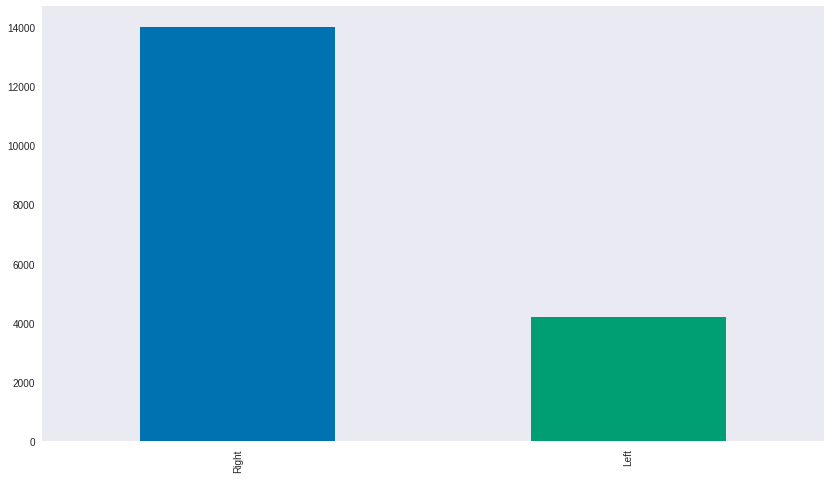

In [0]:
# comparison of preferred foot over the different players

data['Preferred Foot'].value_counts().plot.bar()

In [0]:
#  comparison of international reputation among the players

data['International Reputation'].value_counts()

1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: International Reputation, dtype: int64

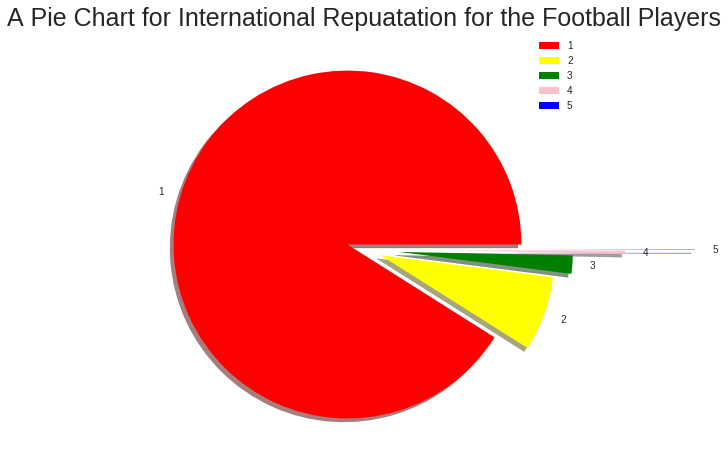

In [0]:
labels = ['1', '2', '3', '4', '5']
sizes = [16532, 1261, 309, 51, 6]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

In [0]:
# A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 
# which specifies the shot power and ball control for the other foot of that player than his preferred foot's.The higher
# rate defines the higher shot power and ball control.

data['Weak Foot'].value_counts()

3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: Weak Foot, dtype: int64

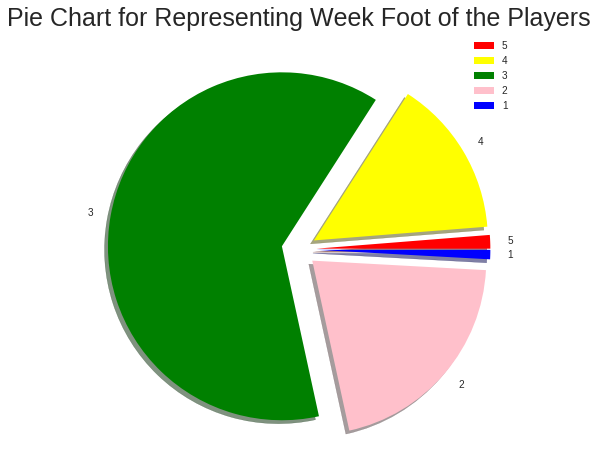

In [0]:
labels = ['5', '4', '3', '2', '1'] 
size = [229, 2662, 11349, 3761, 158]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Week Foot of the Players', fontsize = 25)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


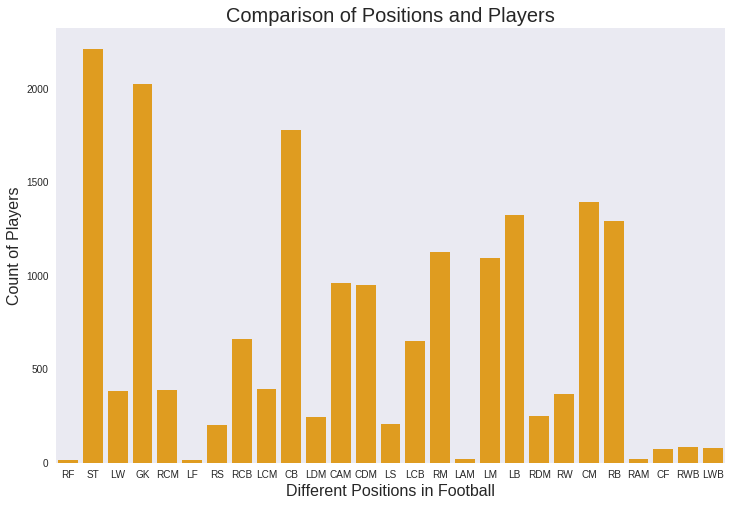

In [0]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = data, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [0]:
data['Wage'].fillna('€200K', inplace = True)
data['Wage'].isnull().any()

False

In [0]:
# defining a function for cleaning the Weight data

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

# applying the function to weight column
#data['value'] = data['value'].apply(lambda x: extract_value_from(x))
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))

data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [0]:
# defining a function for cleaning the wage column

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [0]:
# applying the function to the wage column

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


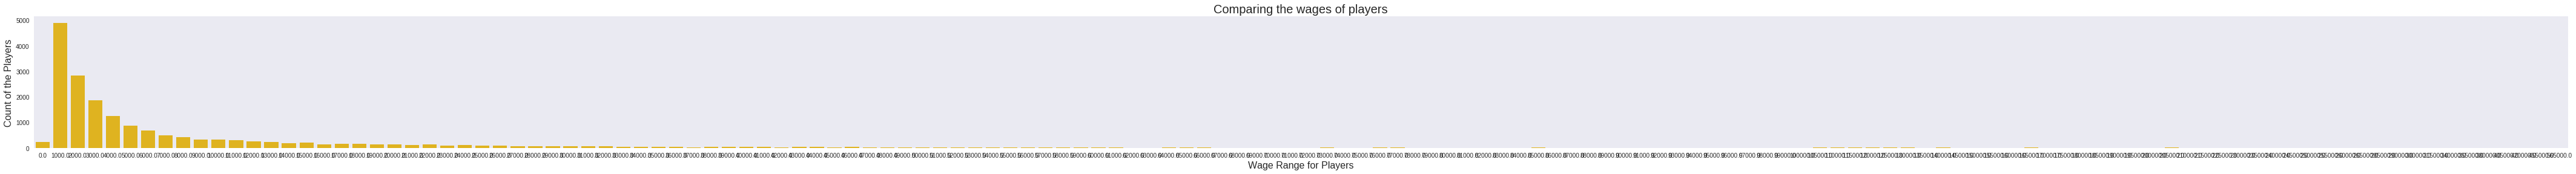

In [0]:
# Comparing the players' Wages

sns.set(style = 'dark', palette = 'bright', color_codes = True)
plt.figure(figsize = (75, 4))
x = data.Wage
sns.countplot(x, data = data, color = 'y')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Comparing the wages of players', fontsize = 20)
plt.show()

In [0]:
data['Height'].head(10)

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
5     5'8
6     5'8
7     6'0
8     6'0
9     6'2
Name: Height, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


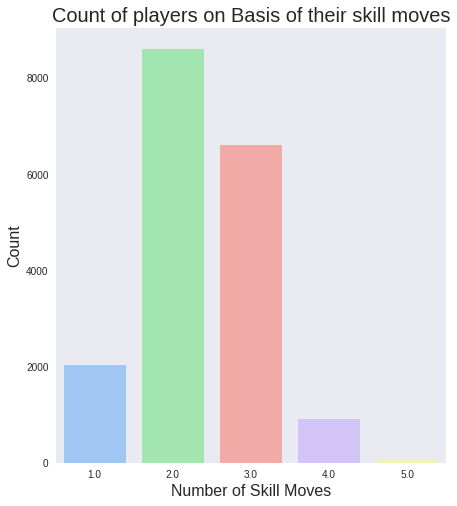

In [0]:
# Skill Moves of Players

plt.figure(figsize = (7, 8))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


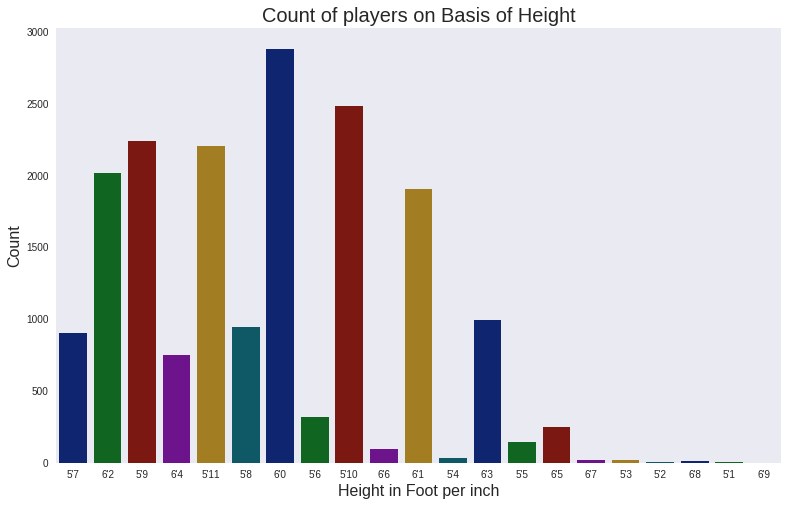

In [0]:
# Height of Players

plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


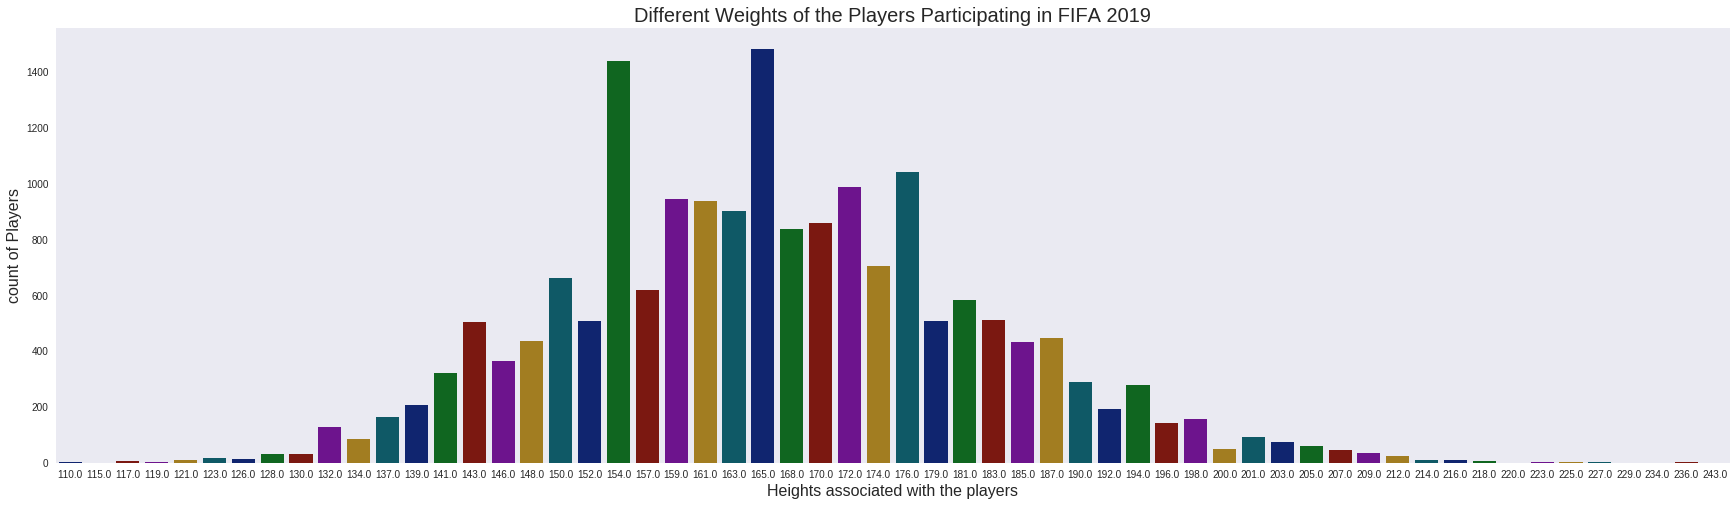

In [0]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (30, 8))
sns.countplot(x = 'Weight', data = data, palette = 'dark')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Heights associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


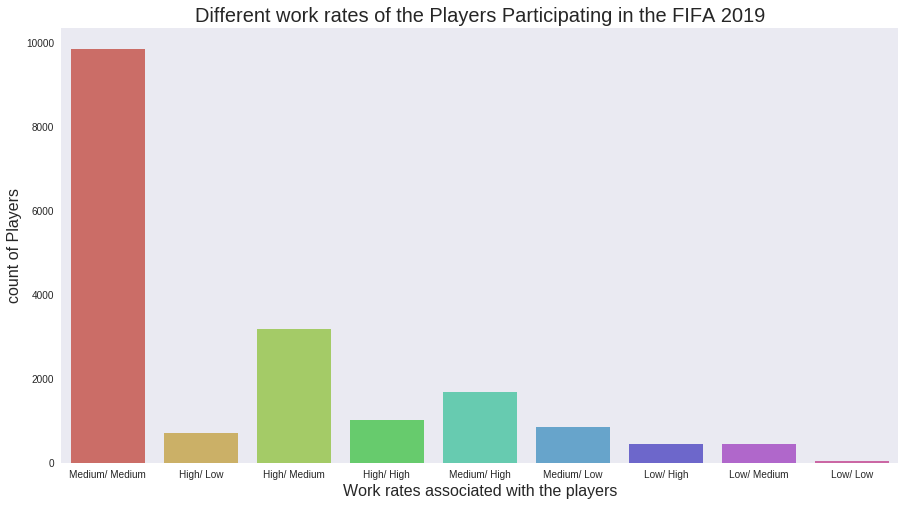

In [0]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 8))
sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


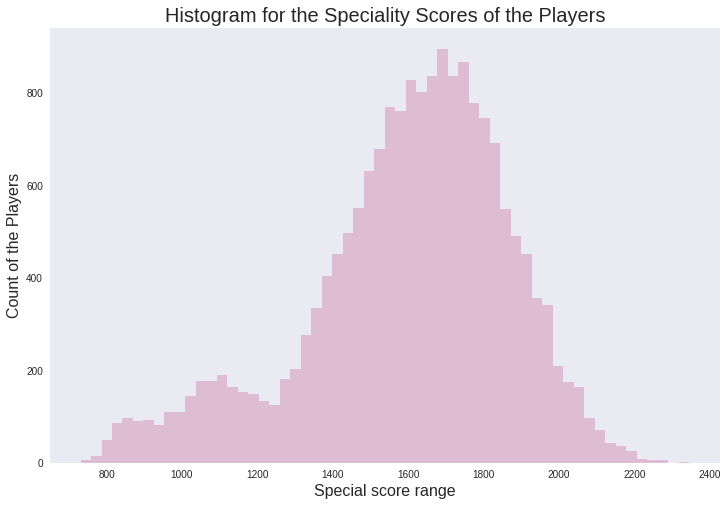

In [0]:
# To show Different Speciality Score of the players participating in the FIFA 2019

sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
x = data.Special
plt.figure(figsize = (12, 8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


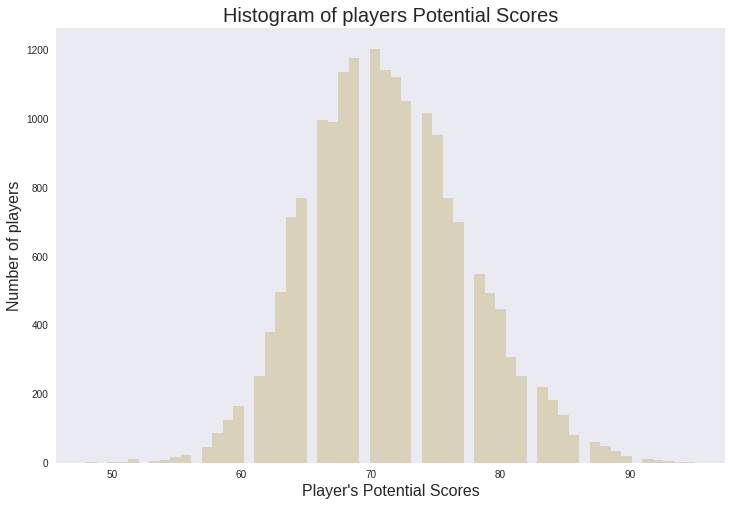

In [0]:
# To show Different potential scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "muted", color_codes = True)
x = data.Potential
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


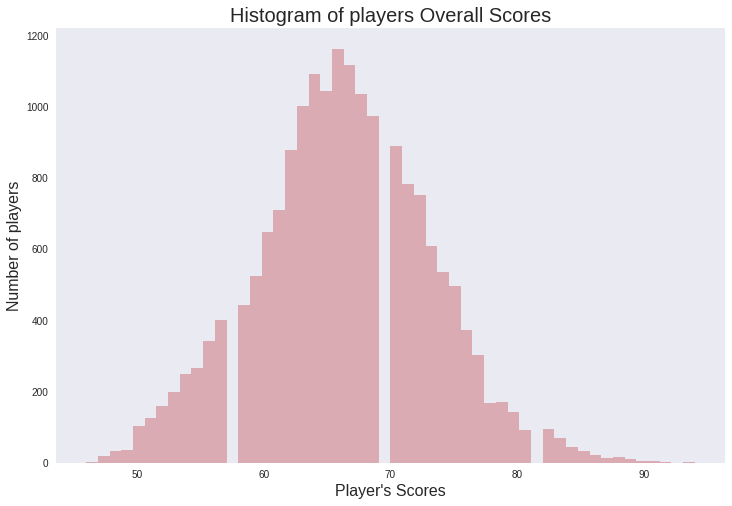

In [0]:
# To show Different overall scores of the players participating in the FIFA 2019

sns.set(style = "dark", palette = "deep", color_codes = True)
x = data.Overall
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = "Player\'s Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 20)
plt.show()

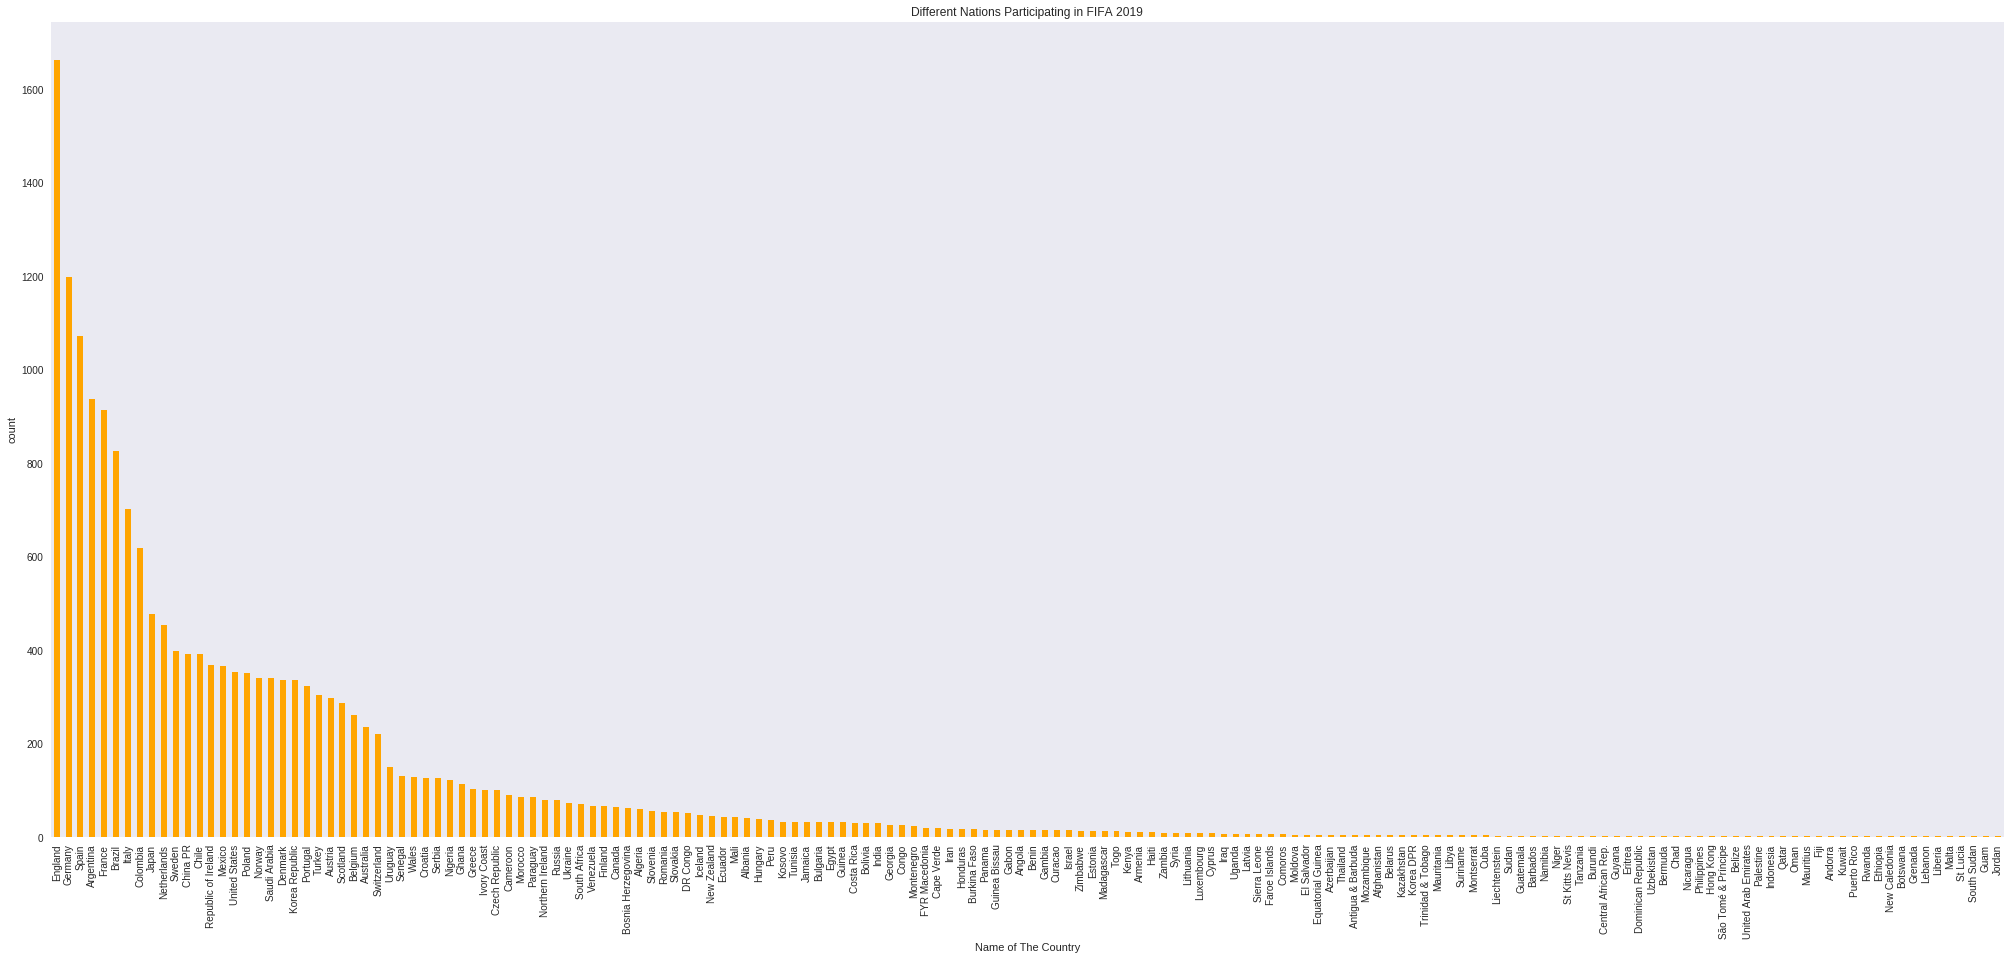

In [0]:
# To show Different nations participating in the FIFA 2019

data['Nationality'].value_counts().plot.bar(color = 'orange', figsize = (35, 15 ))
plt.title('Different Nations Participating in FIFA 2019')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


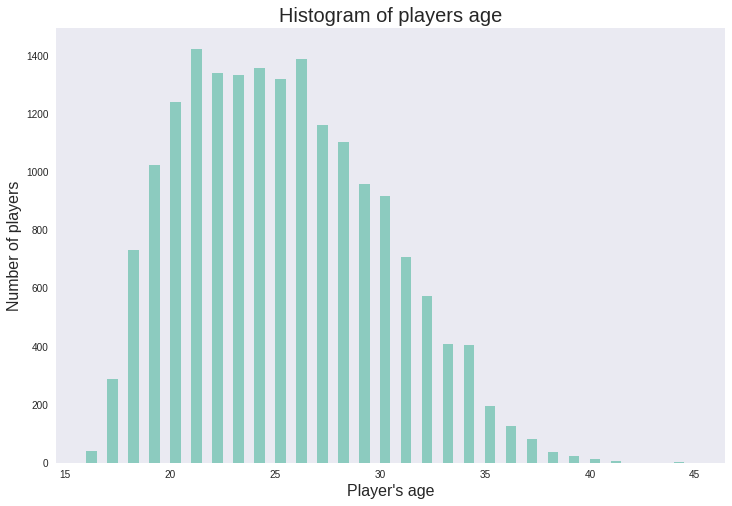

In [0]:
# To show that there are people having same age
# Histogram: number of players's age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Player\'s age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

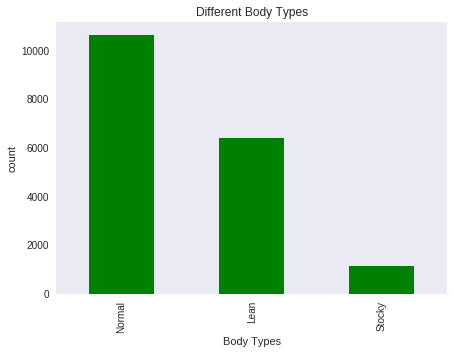

In [0]:
#comparing the different body types of the players participating in FIFA 2019

data['Body Type'].value_counts().plot.bar(color = 'green', figsize = (7, 5))
plt.title('Different Body Types')
plt.xlabel('Body Types')
plt.ylabel('count')
plt.show()

In [0]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data, columns = selected_columns)
data_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [0]:
data_selected.sample(5)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9444,M. Lund,27,Northern Ireland,66,66,Scunthorpe United,€650K,€4K,1824,Right,1.0,3.0,2.0,Medium/ Medium,Lean,LCM,6'0,168lbs,58.0,65.0,68.0,47.0,56.0,60.0,58.0,65.0,67.0,67.0,67.0,58.0,61.0,66.0,67.0,76.0,68.0,75.0,61.0,69.0,66.0,55.0,68.0,53.0,68.0,65.0,66.0,64.0,9.0,8.0,11.0,15.0,11.0,€1.1M
3494,Welinton,29,Brazil,72,72,Alanyaspor,€2.4M,€11K,1758,Right,1.0,2.0,2.0,Low/ Medium,Stocky,CB,5'11,179lbs,43.0,75.0,60.0,53.0,41.0,41.0,53.0,65.0,52.0,53.0,67.0,60.0,60.0,61.0,66.0,81.0,73.0,80.0,41.0,79.0,65.0,62.0,52.0,39.0,55.0,72.0,74.0,73.0,12.0,9.0,14.0,15.0,12.0,€4.8M
526,S. Romero,31,Argentina,80,80,Manchester United,€9M,€91K,1251,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,6'4,192lbs,14.0,12.0,39.0,17.0,12.0,12.0,13.0,48.0,40.0,47.0,44.0,52.0,78.0,44.0,14.0,63.0,35.0,75.0,11.0,33.0,21.0,11.0,55.0,16.0,62.0,14.0,11.0,15.0,78.0,76.0,81.0,77.0,82.0,€16.7M
15424,C. Dunn,30,England,59,59,Walsall,€100K,€1K,982,Left,1.0,2.0,1.0,Medium/ Medium,Lean,GK,6'4,174lbs,15.0,15.0,25.0,11.0,12.0,11.0,13.0,21.0,16.0,45.0,49.0,40.0,48.0,45.0,12.0,54.0,37.0,58.0,13.0,17.0,11.0,11.0,33.0,13.0,38.0,18.0,16.0,13.0,60.0,58.0,59.0,59.0,60.0,€175K
4129,M. Bianchetti,25,Italy,71,72,Hellas Verona,€2.3M,€3K,1500,Right,1.0,3.0,2.0,Low/ High,Normal,CB,6'2,179lbs,21.0,69.0,50.0,19.0,40.0,31.0,36.0,52.0,52.0,46.0,68.0,67.0,68.0,48.0,69.0,71.0,62.0,81.0,41.0,72.0,72.0,21.0,25.0,39.0,65.0,69.0,72.0,70.0,7.0,10.0,5.0,5.0,10.0,€3.9M


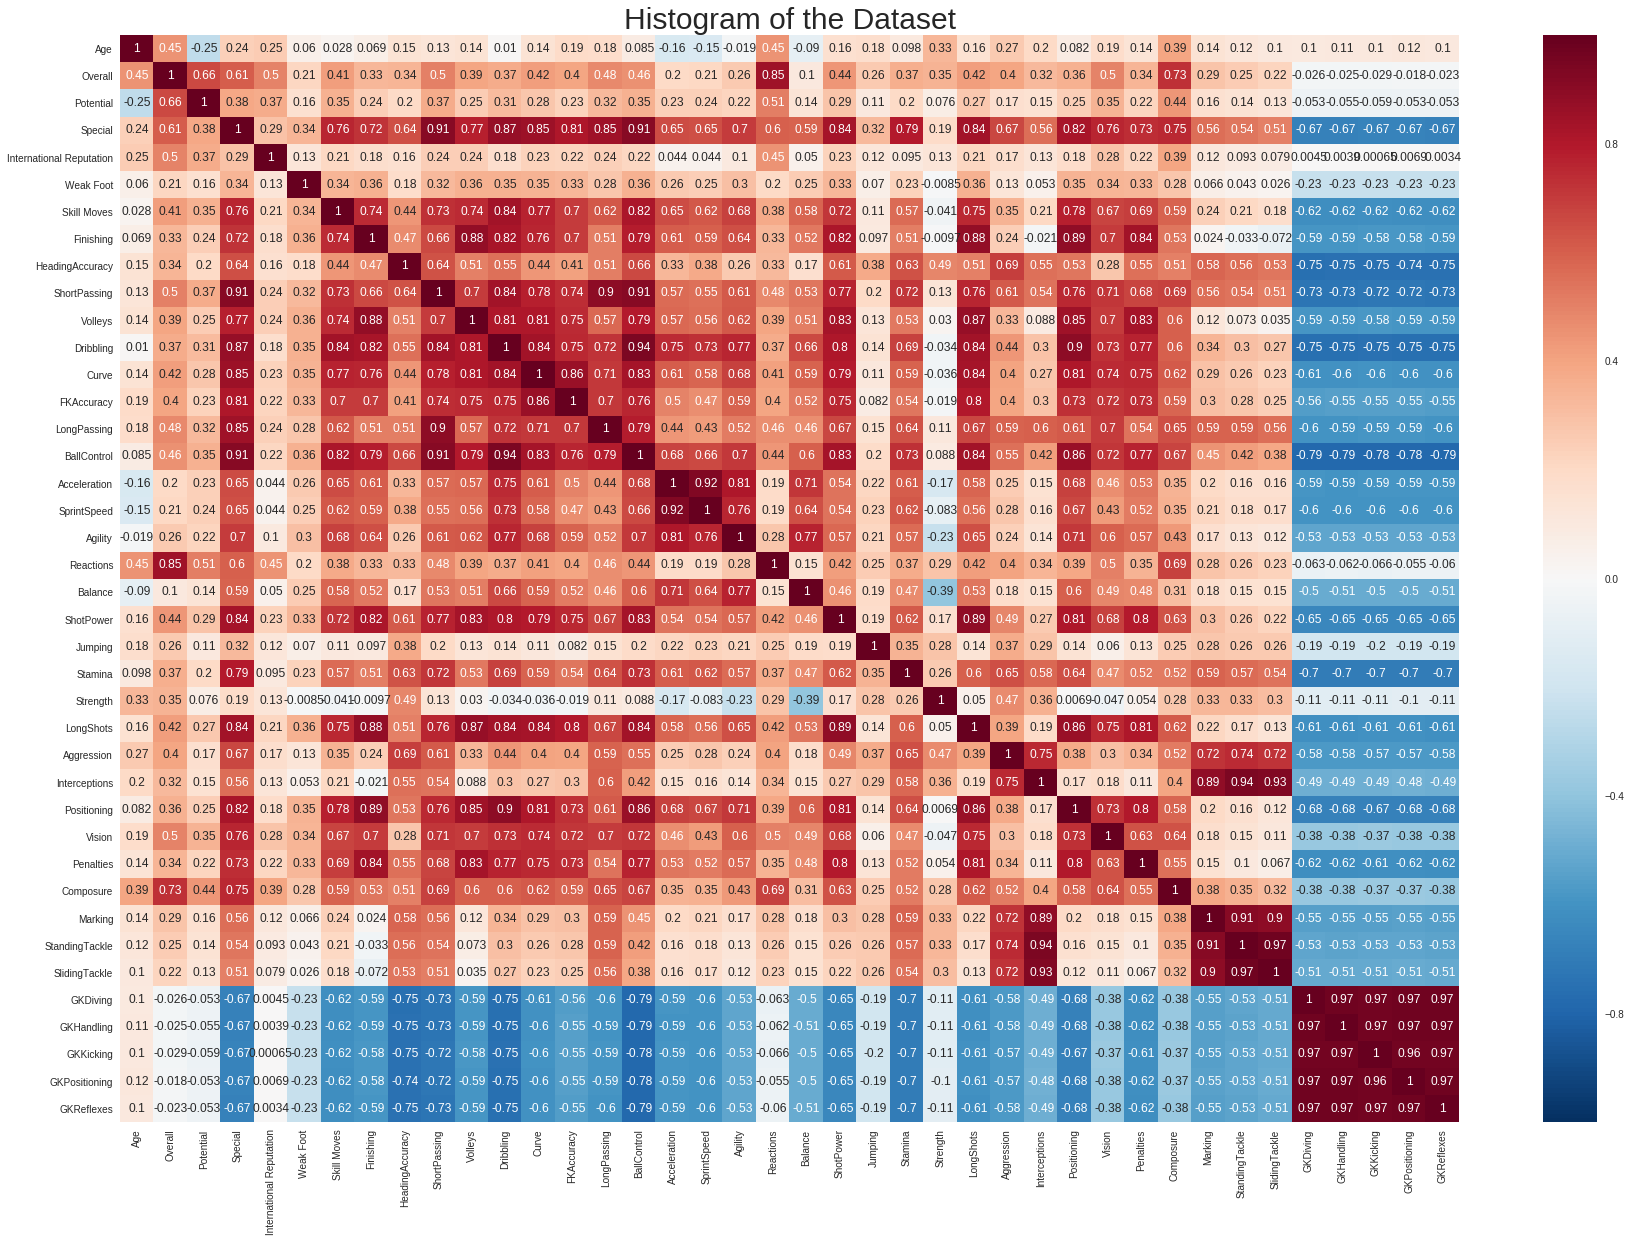

In [0]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(data_selected[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

In [0]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]


,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


In [0]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


In [0]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(8)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Brazil        827
Italy         702
Colombia      618
Name: Nationality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


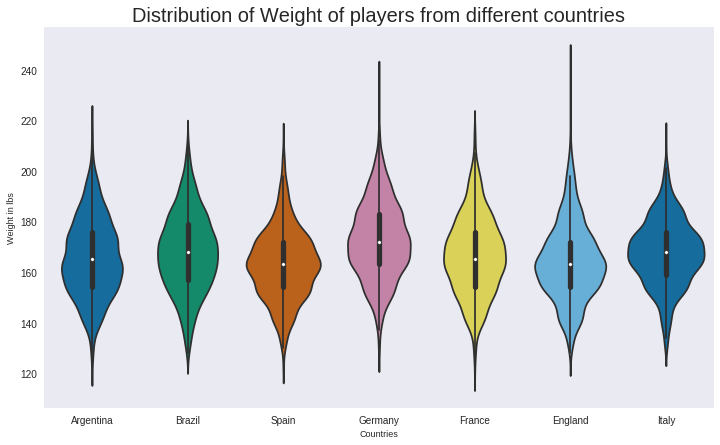

In [0]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


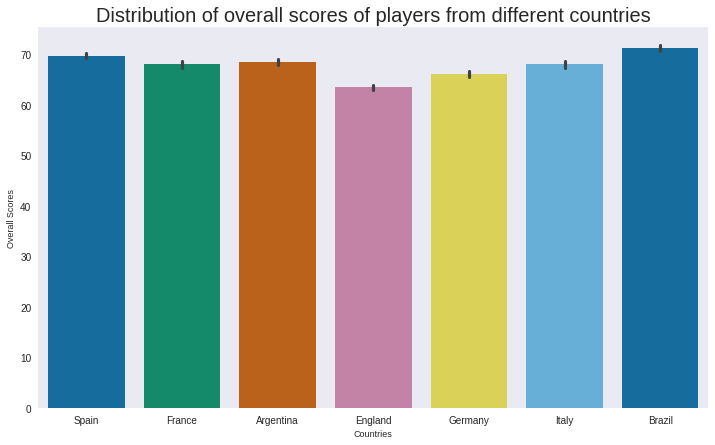

In [0]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


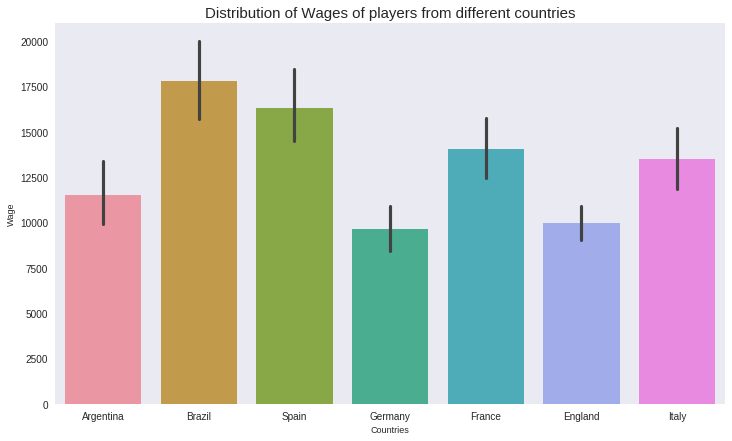

In [0]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'],)
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


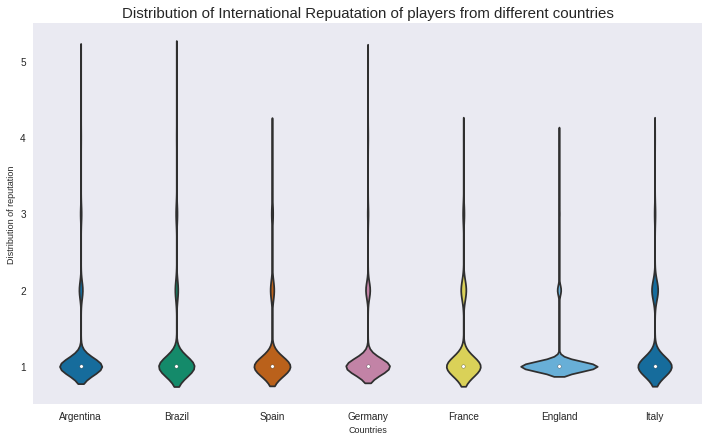

In [0]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.show()

In [0]:
# finding the the popular clubs around the globe

data['Club'].value_counts().head(10)

No Club               241
Tottenham Hotspur      33
Newcastle United       33
Fortuna Düsseldorf     33
Frosinone              33
Liverpool              33
Chelsea                33
Rayo Vallecano         33
CD Leganés             33
FC Barcelona           33
Name: Club, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


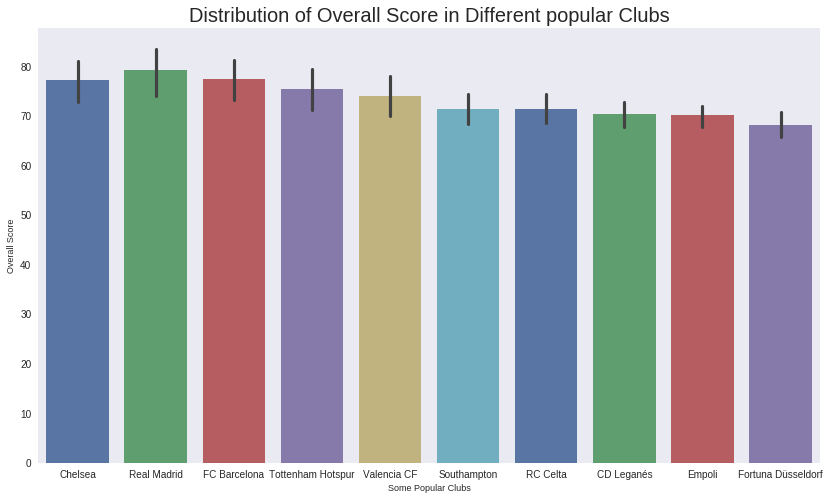

In [0]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'deep')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


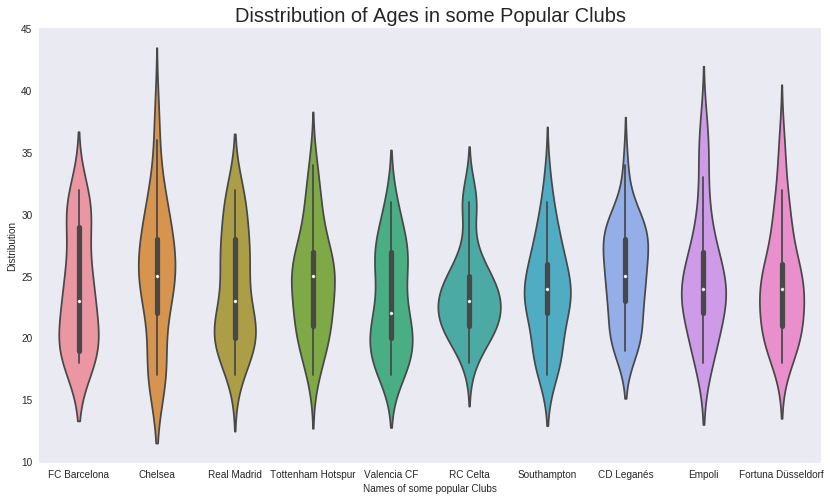

In [0]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Age', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


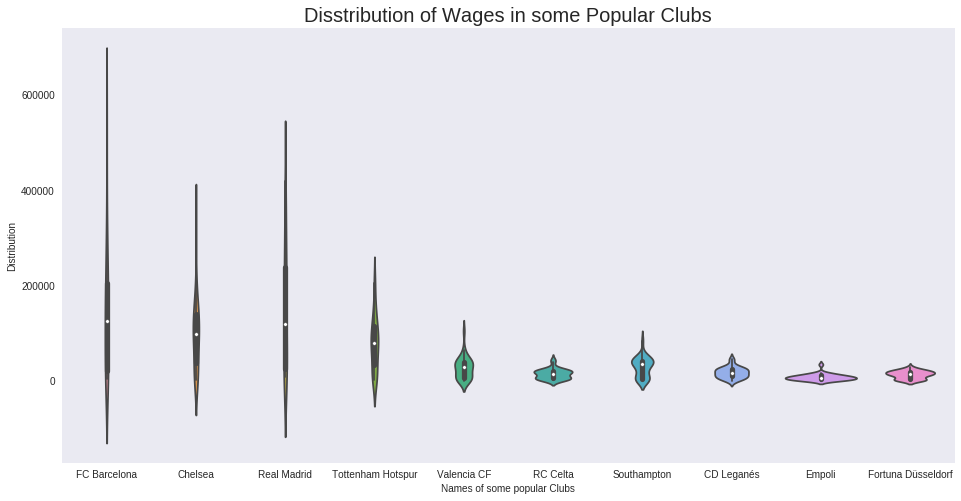

In [0]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'Wage', data = data_club)
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


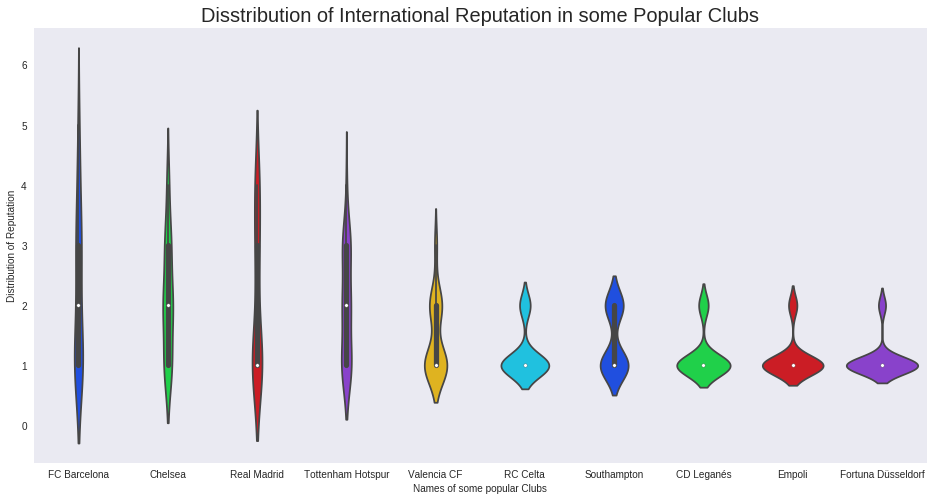

In [0]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.violinplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


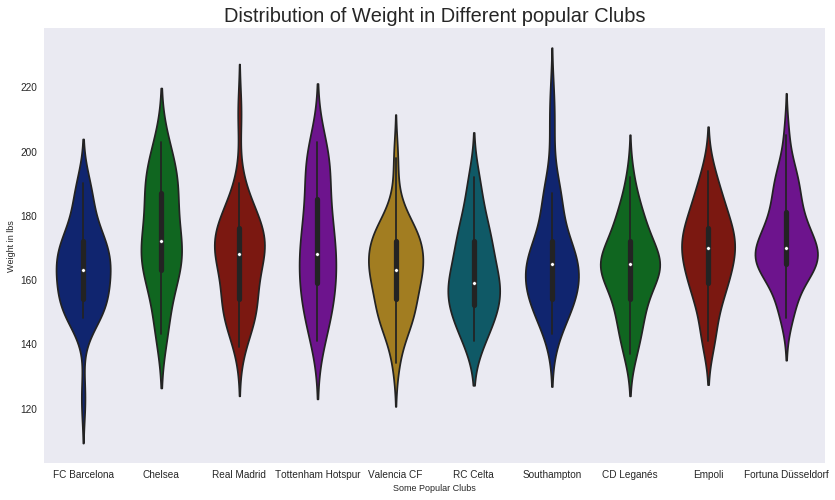

In [0]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.rcParams['figure.figsize'] = (14, 8)
ax = sns.violinplot(x = 'Club', y = 'Weight', data = data_clubs, palette = 'dark')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.show()

In [0]:
# finding 15 youngest Players from the dataset

youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)


                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [0]:
# finding 15 eldest players from the dataset

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [0]:
data['Joined'].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [0]:
# The longest membership in the club

import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,28
M. Al Shalhoub,Al Hilal,21
H. Sogahata,Kashima Antlers,21
M. Ogasawara,Kashima Antlers,21
S. Narazaki,Nagoya Grampus,20
M. Wölfli,BSC Young Boys,19
K. Kitamoto,Vissel Kobe,19
C. Källqvist,BK Häcken,18
Y. Endo,Gamba Osaka,18


In [0]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

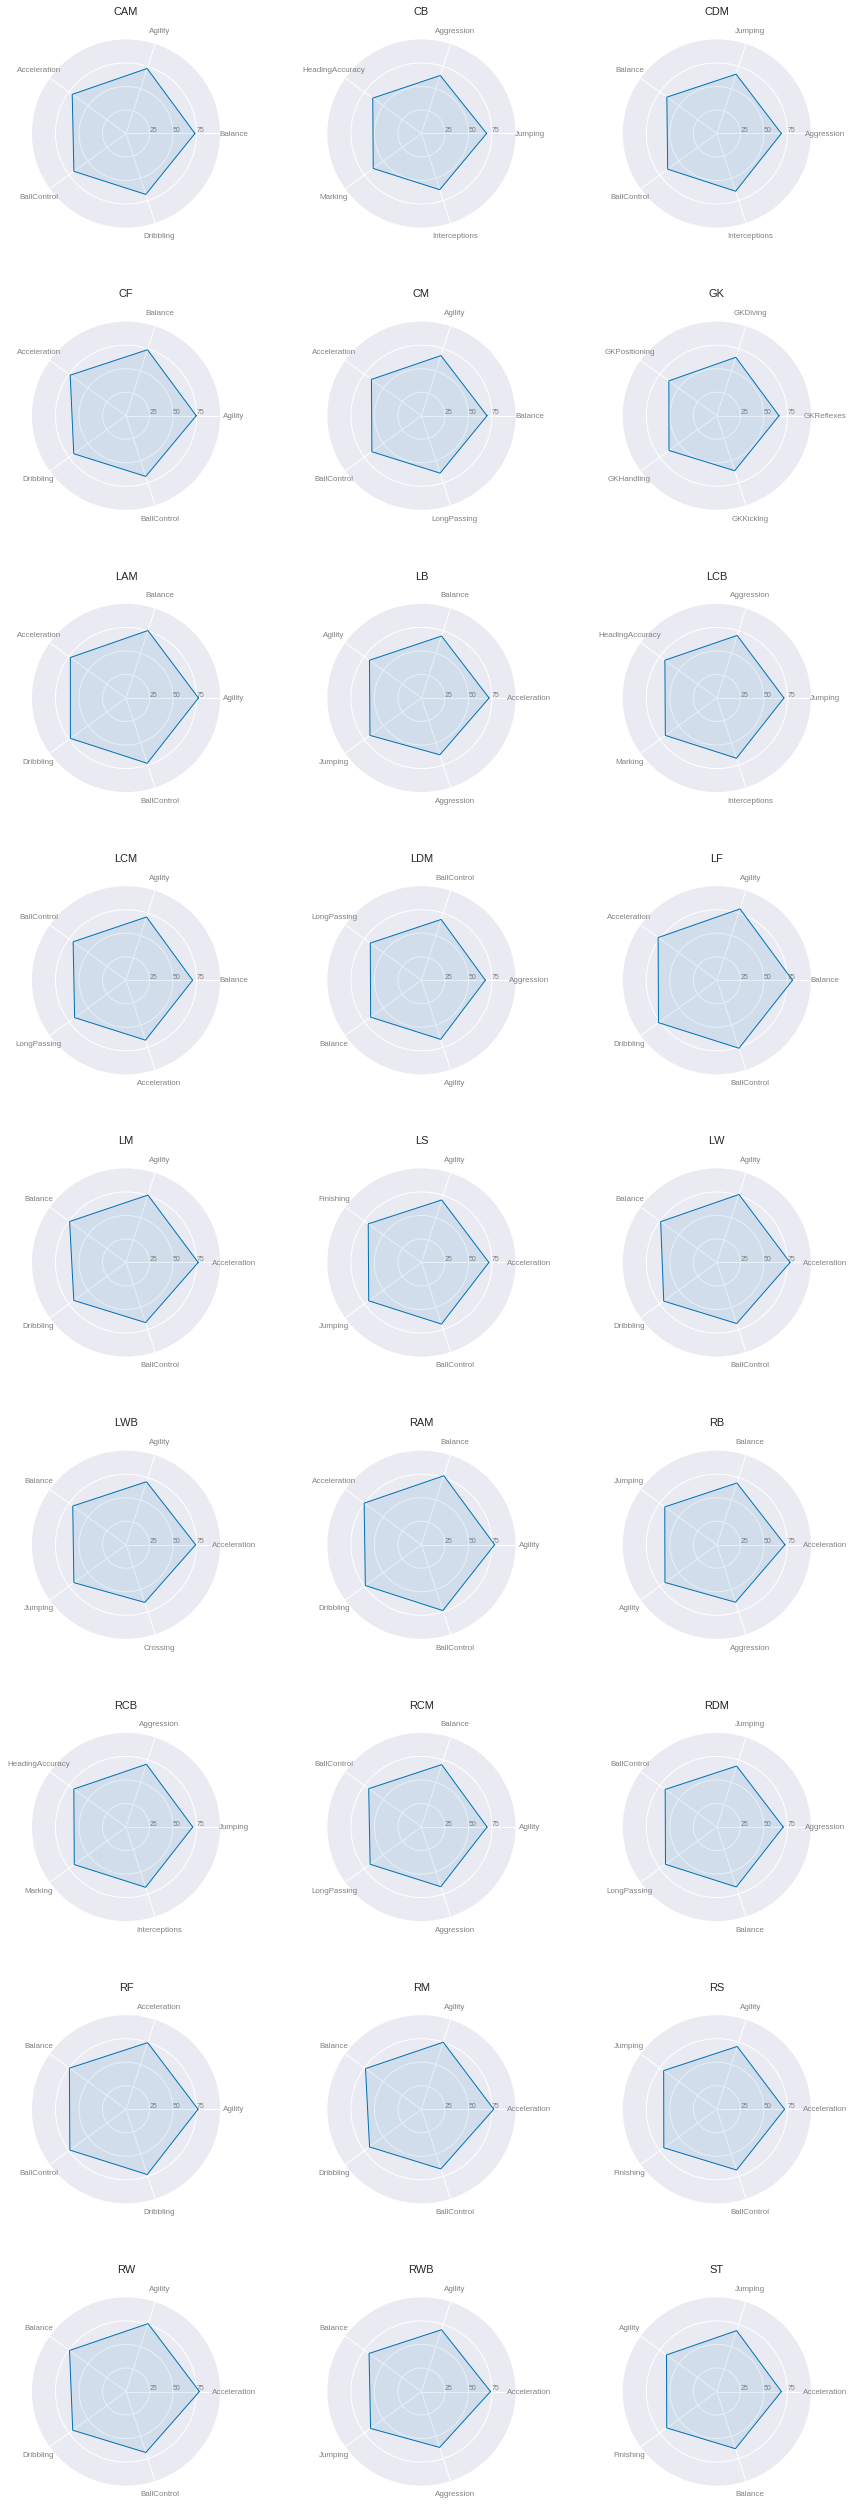

In [0]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories=top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

In [0]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [0]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


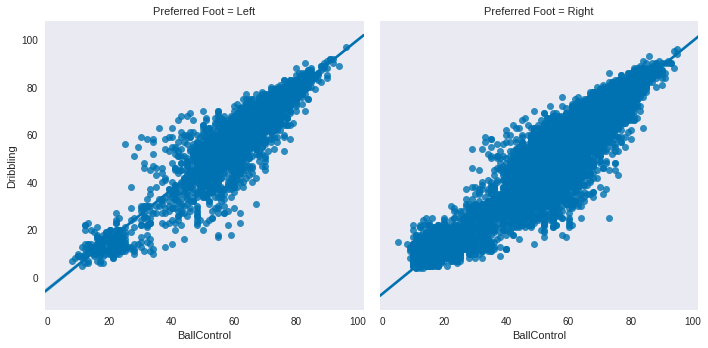

In [0]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')

In [0]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [0]:
# visualizing clubs with highest number of different countries

data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64